In [1]:
# Récupération des packages utiles
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn import dummy
from sklearn import linear_model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
import time
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [3]:
# Lecture de la base de données
df = pd.read_csv('projet4_propre.csv')
print(df)

     PrimaryPropertyType  CouncilDistrictCode           Neighborhood  \
0                  Hotel                    7               downtown   
1                  Hotel                    7               downtown   
2                  Hotel                    7               downtown   
3                  Hotel                    7               downtown   
4                  Hotel                    7               downtown   
...                  ...                  ...                    ...   
1644              Office                    2       greater duwamish   
1645               Other                    2               downtown   
1646               Other                    7  magnolia / queen anne   
1647  Mixed Use Property                    1       greater duwamish   
1648  Mixed Use Property                    2       greater duwamish   

      Latitude  Longitude  NumberofBuildings  NumberofFloors  \
0     47.61220 -122.33799                1.0              12   
1     4

In [4]:
df.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment,log_SiteEnergyUse(kBtu)
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,60.0,0.0,1.0,0.0,Compliant,249.98,89,15.793246
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.0,0.0,1.0,Compliant,295.86,20,15.942305
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,43.0,0.0,1.0,0.0,Compliant,2089.28,47,18.100297
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,56.0,0.0,1.0,0.0,Compliant,286.43,90,15.731637
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,0.0,0.0,1.0,Compliant,505.01,36,16.466822


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PrimaryPropertyType              1649 non-null   object 
 1   CouncilDistrictCode              1649 non-null   int64  
 2   Neighborhood                     1649 non-null   object 
 3   Latitude                         1649 non-null   float64
 4   Longitude                        1649 non-null   float64
 5   NumberofBuildings                1649 non-null   float64
 6   NumberofFloors                   1649 non-null   int64  
 7   PropertyGFATotal                 1649 non-null   int64  
 8   PropertyGFAParking               1649 non-null   int64  
 9   PropertyGFABuilding(s)           1649 non-null   int64  
 10  LargestPropertyUseType           1649 non-null   object 
 11  LargestPropertyUseTypeGFA        1649 non-null   float64
 12  SecondLargestPropert

In [6]:
df.describe()

,CouncilDistrictCode,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,AgeBatiment,log_SiteEnergyUse(kBtu)
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1.649000e+03,1.649000e+03,1649.000000,1649.000000,1083.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,4.357793,47.616187,-122.332937,1.167981,4.078229,1.195743e+05,13005.099454,1.065692e+05,9.921024e+04,19017.599331,3176.525409,65.191136,0.018799,0.735597,0.245603,186.500079,53.799879,14.795207
std,2.190683,0.048273,0.024611,2.944930,6.169477,2.989541e+05,42489.719010,2.857556e+05,2.777254e+05,53540.722112,18064.310665,28.376486,0.135857,0.441148,0.430575,755.634975,32.628052,1.948002
min,1.000000,47.499170,-122.411820,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.800000,1.000000,0.000000
25%,2.000000,47.585420,-122.343320,1.000000,1.000000,2.952500e+04,0.000000,2.853100e+04,2.569100e+04,0.000000,0.000000,48.000000,0.000000,0.000000,0.000000,20.480000,27.000000,14.040512
50%,4.000000,47.612440,-122.332890,1.000000,2.000000,4.974400e+04,0.000000,4.756000e+04,4.409100e+04,0.000000,0.000000,73.000000,0.000000,1.000000,0.000000,49.980000,50.000000,14.764341
75%,7.000000,47.649760,-122.321750,1.000000,4.000000,1.060410e+05,0.000000,9.542600e+04,9.212900e+04,12697.000000,0.000000,89.000000,0.000000,1.000000,0.000000,144.410000,86.000000,15.749562
max,7.000000,47.733870,-122.258640,111.000000,76.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,1.000000,1.000000,1.000000,16870.980000,116.000000,20.588504


In [7]:
df.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,AgeBatiment,log_SiteEnergyUse(kBtu)
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,60.0,0.0,1.0,0.0,Compliant,249.98,89,15.793246
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.0,0.0,1.0,Compliant,295.86,20,15.942305
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,43.0,0.0,1.0,0.0,Compliant,2089.28,47,18.100297
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,56.0,0.0,1.0,0.0,Compliant,286.43,90,15.731637
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,0.0,0.0,1.0,Compliant,505.01,36,16.466822


# Création de l'environnement de mise en place et d'évaluation des modèles

In [8]:
#Création de la target

X = df.drop(['log_SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],axis=1)
y = df['log_SiteEnergyUse(kBtu)']

In [9]:
X

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,60.0,0.0,1.0,0.0,Compliant,89
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,0.0,0.0,1.0,Compliant,20
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,43.0,0.0,1.0,0.0,Compliant,47
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,56.0,0.0,1.0,0.0,Compliant,90
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,0.0,0.0,1.0,Compliant,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Office,2,greater duwamish,47.56722,-122.31154,1.0,1,12294,0,12294,Office,12294.0,Aucune,0.0,Unknown,0.0,46.0,0.0,1.0,0.0,Unknown,26
1645,Other,2,downtown,47.59625,-122.32283,1.0,1,16000,0,16000,Other - Recreation,16000.0,Aucune,0.0,Unknown,0.0,NaN,0.0,0.0,1.0,Compliant,12
1646,Other,7,magnolia / queen anne,47.63644,-122.35784,1.0,1,13157,0,13157,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,0.0,0.0,1.0,Compliant,42
1647,Mixed Use Property,1,greater duwamish,47.52832,-122.32431,1.0,1,14101,0,14101,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,0.0,0.0,1.0,Compliant,27


### Création des pipelines

Nous testerons les modèles suivants : Régression linéaire, Regression Ridge, Adaboost, SVR, RFR, kNN ainsi qu'un DummyRegressor

Nous appliquerons un StandardScaler pour nos données numériques et un OneHotEncoder pour nos données catégoriques

In [10]:
X.dtypes

PrimaryPropertyType                 object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
ENERGYSTARScore                    float64
SteamUse(kBtu)                     float64
Electricity(kBtu)                  float64
NaturalGas(kBtu)                   float64
ComplianceStatus                    object
AgeBatiment                          int64
dtype: object

# 1ère Partie : Sans EnergyStarScore

In [11]:
X = X.drop(['ENERGYSTARScore'], axis =1)

In [12]:
# Encodage/scaling de nos données en fonction de leur type


col_num_int = list(X.select_dtypes(include=["int64"]))
col_num_float = list(X.select_dtypes(include=["float64"]))
col_cat = list(X.select_dtypes(include=["object"]))



ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()
col_num_int_pipe = Pipeline(steps = [('scaler', scaler)])

col_cat_pipe = Pipeline(steps = [('OneHot', ohe)])


In [13]:

preprocessor = ColumnTransformer(transformers=[('ints', col_num_int_pipe, col_num_int),
       ('floats', col_num_int_pipe, col_num_float),
       ('category', col_cat_pipe, col_cat)])



In [14]:
# Création des pipelines pour chacun des modèles testés

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
svr = Pipeline(steps=[('preprocessing',preprocessor),('SVR',SVR())])
elastic = Pipeline(steps=[('preprocessing',preprocessor),('elastic', ElasticNet())])
linear_reg = Pipeline(steps=[('preprocessing',preprocessor),('linear_reg',linear_model.LinearRegression())])
ridge_reg = Pipeline(steps=[('preprocessing',preprocessor),('ridge_reg', Ridge())])
rfr = Pipeline(steps=[('preprocessing',preprocessor),('RFR',RandomForestRegressor(random_state=0))])
knn = Pipeline(steps=[('preprocessing',preprocessor),('kNN',KNeighborsRegressor())])
ada = Pipeline(steps=[('preprocessing',preprocessor),('ADA',AdaBoostRegressor(random_state=0,))])
dummy = Pipeline(steps=[('preprocessing',preprocessor),('dummy',DummyRegressor(strategy='mean'))])


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gradient = Pipeline(steps=[('preprocessing',preprocessor),('GradientBoosting', GradientBoostingRegressor())])

In [16]:
rfr

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CouncilDistrictCode',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'AgeBatiment']),
                                                 ('floats',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
          

In [17]:
X.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,89
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,0.0,0.0,1.0,Compliant,20
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,47
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,90
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,0.0,0.0,1.0,Compliant,36


In [18]:
X.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
0,Hotel,7,downtown,47.61220,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,89
1,Hotel,7,downtown,47.61317,-122.33393,1.0,11,103566,15064,88502,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,0.0,0.0,1.0,Compliant,20
2,Hotel,7,downtown,47.61393,-122.33810,1.0,41,956110,196718,759392,Hotel,756493.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,47
3,Hotel,7,downtown,47.61412,-122.33664,1.0,10,61320,0,61320,Hotel,61320.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,90
4,Hotel,7,downtown,47.61375,-122.34047,1.0,18,175580,62000,113580,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,0.0,0.0,1.0,Compliant,36


## Séparation du jeu de données

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)


In [20]:
X_train.shape

(1319, 21)

In [21]:
X_test.shape

(330, 21)

In [22]:
X_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,0.0,0.0,1.0,Compliant,61


test rfr

In [23]:
rfr.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CouncilDistrictCode',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'AgeBatiment']),
                                                 ('floats',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
          

In [24]:
rfr.score(X_test,y_test)

0.28126186668968245

## Recherche des hyperparamètres optimaux pour chacune des catégories de modèles

#### DummyRegressor

In [25]:
dummy.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('ints',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['CouncilDistrictCode',
                                                   'NumberofFloors',
                                                   'PropertyGFATotal',
                                                   'PropertyGFAParking',
                                                   'PropertyGFABuilding(s)',
                                                   'AgeBatiment']),
                                                 ('floats',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
          

In [26]:
dummy.predict(X_test)

array([14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78371741,
       14.78371741, 14.78371741, 14.78371741, 14.78371741, 14.78

#### ElasticNet 

In [27]:
parameters_elastic = {'elastic__tol' : [0.1,0.01,0.001,0.0001], #seuil de tolérance de modification des poids pour que 
                                                       #l'algorithme converge
              "elastic__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #poids du terme de pénalité
              "elastic__l1_ratio": [0, 0.2,0.4,0.6,0.8,1]} #0 = Ridge / 1= Lasso

In [28]:
elastic_search = GridSearchCV(elastic,
                               param_grid = parameters_elastic,
                              scoring= 'neg_mean_squared_error',
                              verbose=3,
                               cv=5)

elastic_search_cv = elastic_search.fit(X_train, y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119.669606599409, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.044 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.0161870483423, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.981 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.7534683983208, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-6.076 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203.16606641975, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.668 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.6877433816029, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.165 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119.669606599409, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.044 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.0161870483423, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.981 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.7534683983208, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-6.076 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203.16606641975, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.668 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.6877433816029, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.165 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119.669606599409, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.044 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.0161870483423, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.981 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.7534683983208, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-6.076 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203.16606641975, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.668 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.6877433816029, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.165 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1119.669606599409, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.044 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.0161870483423, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.981 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1073.7534683983208, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-6.076 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203.16606641975, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.668 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 956.6877433816029, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.165 total time=   0.6s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2.046 total time=   0.5s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.985 total time=   0.4s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-6.082 total time=   0.4s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.667 total time=   0.3s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.129 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.57388434429004, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2.046 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.36099371323303, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.985 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.51573724007358, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-6.081 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.11522839735994, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1.667 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.038962708686086, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.163 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.57388434429004, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-2.046 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.36099371323303, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-3.985 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.51573724007358, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-6.081 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.11522839735994, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1.667 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.038962708686086, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-4.163 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.57388434429004, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-2.046 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.36099371323303, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-3.985 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 183.51573724007358, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-6.081 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 120.11522839735994, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1.667 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.038962708686086, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-4.163 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-2.049 total time=   0.3s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-3.990 total time=   0.3s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-6.088 total time=   0.2s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1.665 total time=   0.2s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-4.108 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.88402195696062, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-2.049 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.4465624546881, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-3.990 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.5154071598149, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-6.087 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.56851085051312, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1.666 total time=   0.5s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-4.131 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.88402195696062, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-2.049 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.4465624546881, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-3.990 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.5154071598149, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-6.087 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.56851085051312, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1.666 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.303265728789711, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-4.157 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.88402195696062, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-2.049 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.4465624546881, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-3.990 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.5154071598149, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-6.087 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.56851085051312, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1.666 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.303265728789711, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-4.157 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-2.051 total time=   0.2s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-3.999 total time=   0.2s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-6.100 total time=   0.0s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1.665 total time=   0.2s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-4.090 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.40979855222736, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-2.051 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.00695335798468, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-4.000 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.16383393441129, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-6.094 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.42595083599599, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1.665 total time=   0.5s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-4.111 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.40979855222736, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-2.051 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.00695335798468, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-4.000 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.16383393441129, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-6.094 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.42595083599599, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1.665 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.02067590834622, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-4.145 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.40979855222736, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-2.051 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110.00695335798468, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-4.000 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105.16383393441129, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-6.094 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.42595083599599, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1.665 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.02067590834622, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-4.145 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-2.053 total time=   0.2s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-4.005 total time=   0.2s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-6.116 total time=   0.0s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1.665 total time=   0.2s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-4.074 total time=   0.0s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-2.054 total time=   0.4s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-4.006 total time=   0.3s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-6.108 total time=   0.0s
[CV 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.64260792787513, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-2.054 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.072850054009677, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-4.006 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.63342300102363, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-6.102 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.328901590089117, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1.665 total time=   0.5s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-4.102 total time=   0.3s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.64260792787513, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2.054 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.072850054009677, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.006 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.63342300102363, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-6.102 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.328901590089117, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.665 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7740495786388237, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.117 total time=   0.4s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-2.056 total time=   0.1s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.014 total time=   0.1s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-6.125 total time=   0.0s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.664 total time=   0.1s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.059 total time=   0.0s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-2.056 total time=   0.2s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-4.014 total time=   0.3s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-6.118 total time=   0.0s
[CV 4/5] END elastic

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.878027930600183, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-6.118 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1.664 total time=   0.4s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-4.057 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.725440979927498, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-2.056 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8355899887578744, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-4.014 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.878027930600183, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-6.118 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.214308953136424, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1.664 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6817290040883108, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-4.057 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182.6228148338776, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.016 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006.5304155056742, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.756 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137.7677008877888, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-6.373 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265.0094505187647, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.632 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.1849158699063, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.147 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182.6228148338776, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.016 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006.5304155056742, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.756 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137.7677008877888, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-6.373 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265.0094505187647, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.632 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.1849158699063, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.147 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182.6228148338776, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.016 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006.5304155056742, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.756 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137.7677008877888, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-6.373 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265.0094505187647, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.632 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.1849158699063, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.147 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182.6228148338776, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.016 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1006.5304155056742, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.756 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1137.7677008877888, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-6.373 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265.0094505187647, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.632 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.1849158699063, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.147 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2.020 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.741 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-6.430 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.631 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.148 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2.021 total time=   0.3s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.741 total time=   0.2s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-6.416 total time=   0.2s
[CV 4/5] END el

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.140727015554603, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1.631 total time=   0.5s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-4.151 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8680840063148025, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-2.020 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4571388191143342, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-3.741 total time=   0.5s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-6.414 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.140727015554603, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1.631 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.462322459888128, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-4.151 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-2.024 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-3.730 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-6.510 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1.629 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-4.130 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-2.026 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-3.731 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-6.479 total time=   0.0s
[CV 4/5] END 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1749153267296606, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-2.026 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2303548766999484, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-3.731 total time=   0.5s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-6.473 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8203583562622043, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1.627 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.243412177940172, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-4.157 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-2.032 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-3.719 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-6.577 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1.627 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-4.106 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-2.034 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-3.719 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-6.529 total time=   0.0s
[CV 4/5] END 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.114612445503099, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-2.034 total time=   0.5s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-3.719 total time=   0.2s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-6.524 total time=   0.1s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1.624 total time=   0.3s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-4.166 total time=   0.3s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.114612445503099, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-2.034 total time=   0.5s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-3.719 total time=   0.5s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-6.519 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4746371228834505, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1.624 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2547272089886974, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-4.166 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-2.039 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-3.716 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-6.633 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1.619 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-4.089 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-2.041 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-3.717 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-6.574 total time=   0.0s
[CV 4/5] END 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.103077538094567, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2.042 total time=   0.4s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.717 total time=   0.3s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-6.563 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.733884344631406, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.615 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6403473261550516, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.179 total time=   0.4s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-2.055 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.719 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-6.662 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.604 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.071 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-2.059 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.721 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-6.588 total time=   0.0s
[CV 4/5] END elastic__alpha=0

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2861923133627897, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-2.060 total time=   0.4s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-3.721 total time=   0.3s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-6.580 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.497042603863065, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1.600 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.277682718243341, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-4.074 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320.7052131247565, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.104 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.0393612330743, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.772 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279.9212746220298, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-7.518 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1418.0493291132711, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.550 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080.457751383265, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.221 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320.7052131247565, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.104 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.0393612330743, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.772 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279.9212746220298, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-7.518 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1418.0493291132711, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.550 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080.457751383265, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.221 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320.7052131247565, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.104 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.0393612330743, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.772 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279.9212746220298, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-7.518 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1418.0493291132711, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.550 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080.457751383265, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.221 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320.7052131247565, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.104 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1133.0393612330743, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.772 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1279.9212746220298, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-7.518 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1418.0493291132711, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.550 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080.457751383265, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.221 total time=   0.6s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2.122 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.772 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-7.849 total time=   0.0s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.550 total time=   0.0s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.251 total time=   0.0s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2.123 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.772 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-7.802 total time=   0.0s
[CV 4/5] END elastic__al

[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-4.344 total time=   0.0s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2.184 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.825 total time=   0.1s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-8.001 total time=   0.0s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.557 total time=   0.0s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.343 total time=   0.1s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-2.198 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.869 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-7.639 total time=   0.0s
[CV 4/5] END elas

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.3978919411293, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.351 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314.091691029365, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.028 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.2165422304238, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-7.351 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663.7543165698394, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.300 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249.8372301690183, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.588 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.3978919411293, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.351 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314.091691029365, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.028 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.2165422304238, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-7.351 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663.7543165698394, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.300 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249.8372301690183, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.588 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.3978919411293, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.351 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314.091691029365, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.028 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.2165422304238, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-7.351 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663.7543165698394, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.300 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249.8372301690183, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.588 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1516.3978919411293, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.351 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1314.091691029365, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.028 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1480.2165422304238, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-7.351 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1663.7543165698394, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.300 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1249.8372301690183, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.588 total time=   0.5s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2.490 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.177 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-6.640 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.284 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.789 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2.492 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.173 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-6.888 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, 

[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.413 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.848 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.229 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-5.300 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-2.741 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.481 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.263 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.224 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.458 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, el

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.0648803056165, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.744 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549.4148815902145, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.323 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.536464585276, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.374 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.308458722965, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.048 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1457.2936621151973, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-5.119 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.0648803056165, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.744 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549.4148815902145, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.323 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.536464585276, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.374 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.308458722965, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.048 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1457.2936621151973, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-5.119 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.0648803056165, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.744 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549.4148815902145, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.323 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.536464585276, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.374 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.308458722965, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.048 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1457.2936621151973, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-5.119 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.0648803056165, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.744 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549.4148815902145, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.323 total time=   0.7s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.536464585276, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.374 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.308458722965, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.048 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1457.2936621151973, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-5.119 total time=   0.6s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.137 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.584 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.292 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.186 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-5.560 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.138 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.584 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.283 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.

[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970.4944444440898, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.303 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.6311415157081, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.684 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1965.7431116169346, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.999 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2233.472545831442, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.273 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1689.9483023583755, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-5.488 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970.4944444440898, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.303 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.6311415157081, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.684 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1965.7431116169346, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.999 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2233.472545831442, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.273 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1689.9483023583755, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-5.488 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970.4944444440898, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.303 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.6311415157081, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.684 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1965.7431116169346, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.999 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2233.472545831442, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.273 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1689.9483023583755, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-5.488 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1970.4944444440898, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.303 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1789.6311415157081, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.684 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1965.7431116169346, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.999 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2233.472545831442, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.273 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1689.9483023583755, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-5.488 total time=   0.5s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l

[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.001;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.001;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.001;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=1, 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2050.0687779629848, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.610 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.766377122327, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.907 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.2711383615833, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.386 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.6039040866754, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.536 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.1164666594052, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-5.642 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2050.0687779629848, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.610 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.766377122327, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.907 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.2711383615833, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.386 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.6039040866754, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.536 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.1164666594052, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-5.642 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2050.0687779629848, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.610 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.766377122327, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.907 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.2711383615833, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.386 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.6039040866754, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.536 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.1164666594052, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-5.642 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2050.0687779629848, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.610 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.766377122327, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.907 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.2711383615833, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.386 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.6039040866754, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.536 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.1164666594052, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-5.642 total time=   0.5s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, 

[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=10

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2135.007940635496, tolerance: 508.98098710202834
  model = cd_fast.sparse_enet_coordinate_descent(


In [29]:
ElasticNet().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [30]:
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(elastic_search_cv.best_params_))
print("Le meilleur score est {}".format(elastic_search_cv.best_score_))

Les meilleurs hyper-paramètres pour le ElasticNet sont: {'elastic__alpha': 1, 'elastic__l1_ratio': 0, 'elastic__tol': 0.1}
Le meilleur score est -3.521624441641427


In [31]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_elastic_opti = {key :[value] for key,value in elastic_search_cv.best_params_.items()}
parameters_elastic_opti

{'elastic__alpha': [1], 'elastic__l1_ratio': [0], 'elastic__tol': [0.1]}

In [32]:

start_time = time.time()
elastic_search_opti = GridSearchCV(elastic,
                               param_grid = parameters_elastic_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

elastic_search_r2 = elastic_search_opti.fit(X_train, y_train)
elapsed_time = time.time() - start_time

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1755.0648803056165, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.246 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1549.4148815902145, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.125 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1728.536464585276, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-0.248 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1974.308458722965, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.317 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1457.2936621151973, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.081 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2135.007940635496, tolerance: 508.98098710202834
  model = cd_fast.sparse_enet_coordinate_descent(


In [33]:
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(elastic_search_r2.best_params_))
print("Le meilleur score est {}".format(elastic_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Les meilleurs hyper-paramètres pour le ElasticNet sont: {'elastic__alpha': 1, 'elastic__l1_ratio': 0, 'elastic__tol': 0.1}
Le meilleur score est 0.10416466468753058
Elapsed time to compute the importances: 4.101 seconds


In [34]:
start_elastic = time.time()
y_pred = elastic_search_r2.predict(X_train)
end_elastic = time.time()

predict_time_elastic = end_elastic - start_elastic

In [35]:
resultats_2 = pd.DataFrame({})
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['ElasticNet'],
    'Score_RMSE' : [np.sqrt(-elastic_search_cv.best_score_)],
    'Score_R2' : [elastic_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time],
    'TempsPrédictionOpti' : [predict_time_elastic]}),
              ignore_index=True)

In [36]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955


#### RandomForestRegressor

In [37]:
parameters_rfr = {'RFR__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'RFR__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'RFR__max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}
    

In [38]:

rfr_search = GridSearchCV(rfr,
                               param_grid = parameters_rfr,
                              verbose=3,
                              scoring = 'neg_mean_squared_error',
                               cv=5)

rfr_search_cv = rfr_search.fit(X_train, y_train)

print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_search_cv.best_params_))
print("Le meilleur score est {}".format(rfr_search_cv.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-1.639 total time=   0.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-3.251 total time=   0.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-2.113 total time=   0.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-0.633 total time=   0.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-4.018 total time=   0.2s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-1.391 total time=   1.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-3.097 total time=   1.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-1.497 total time=   1.4s
[C

[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-1.738 total time=   5.7s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-3.135 total time=   5.9s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-1.886 total time=   5.9s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-0.701 total time=   5.8s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-4.162 total time=   5.9s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=10, RFR__n_estimators=10;, score=-2.104 total time=   0.0s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=10, RFR__n_estimators=10;, score=-3.671 total time=   0.0s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=10, RFR__n_estimators=10;, score=-2.304 total time=   0.0s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_le

[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-1.810 total time=   0.8s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-3.353 total time=   0.9s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-1.868 total time=   0.8s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-0.710 total time=   0.6s
[CV 5/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-4.214 total time=   0.7s
[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=500;, score=-1.837 total time=   1.2s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=500;, score=-3.343 total time=   1.3s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=500;, score=-1.871 total time=   1.3s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_le

In [39]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:
from sklearn.metrics import r2_score

In [43]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_rfr_opti = {key :[value] for key,value in rfr_search_cv.best_params_.items()}
parameters_rfr_opti

{'RFR__max_features': ['sqrt'],
 'RFR__min_samples_leaf': [1],
 'RFR__n_estimators': [100]}

In [44]:

start_time2 = time.time()

rfr_search_opti = GridSearchCV(rfr,
                               param_grid = parameters_rfr_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

rfr_search_r2 = rfr_search_opti.fit(X_train, y_train)
elapsed_time2 = time.time() - start_time2

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.662 total time=   0.4s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.322 total time=   0.4s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.555 total time=   0.5s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.640 total time=   0.4s
[CV 5/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.340 total time=   0.4s


In [45]:
print("Les meilleurs hyper-paramètres pour le RandomForestRegressor sont: {}".format(rfr_search_r2.best_params_))
print("Le meilleur score est {}".format(rfr_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time2:.3f} seconds")

Les meilleurs hyper-paramètres pour le RandomForestRegressor sont: {'RFR__max_features': 'sqrt', 'RFR__min_samples_leaf': 1, 'RFR__n_estimators': 100}
Le meilleur score est 0.5038438946887471
Elapsed time to compute the importances: 3.308 seconds


In [46]:
import pickle
pickle.dump(rfr_search_r2, open('rfr_search_r2.pickle', 'wb'))
pic_rfr_search2 = pickle.load(open('rfr_search_r2.pickle', 'rb'))


In [47]:
pic_rfr_search2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ints',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CouncilDistrictCode',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'AgeBatiment']),
                                                              

In [48]:
start_rfr = time.time()
y_pred = rfr_search_r2.predict(X_train)
end_rfr = time.time()

predict_time_rfr = end_rfr - start_rfr

In [49]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['RandomForestReg'],
    'Score_RMSE' : [np.sqrt(-rfr_search_cv.best_score_)],
    'Score_R2' : [rfr_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time2],
    'TempsPrédictionOpti' :[predict_time_rfr]}),
              ignore_index=True)

In [50]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348


#### Support Vector Regression

In [51]:
parameters_svr = {'SVR__gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 
              'SVR__epsilon' : [0.001, 0.01, 0.1, 1], #erreur acceptée par l'algorithme
              'SVR__C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation

In [52]:

svr_search = GridSearchCV(svr, 
                      param_grid = parameters_svr,
                      cv=5,
                        scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

svr_search_cv = svr_search.fit(X_train, y_train)




Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-3.679 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-1.571 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-5.627 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-3.679 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1.571 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gam

[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-3.681 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-3.505 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1.573 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-3.681 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-3.505 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-1.573 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=

[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-1.571 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-5.627 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-3.678 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-4.943 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-3.503 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-1.570 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-5.626 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-3.673 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-4.940 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SV

[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-1.573 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-3.676 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-4.940 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-3.496 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-1.568 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-5.622 total time=   0.1s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-3.629 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-4.908 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-3.437 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, S

[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-4.638 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-2.985 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-1.189 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-5.505 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-2.747 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-4.216 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-2.614 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-0.797 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-5.139 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.1;, score=-2.837 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SV

[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-2.843 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-4.245 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-2.683 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-0.879 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-5.024 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-3.640 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-4.966 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-3.534 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-1.537 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-5.751 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-07;, score=-3.640 total t

[CV 5/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-08;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-3.678 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-3.503 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-1.572 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-3.673 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-4.940 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-3.491 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-1.567 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-5.

[CV 1/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-3.597 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-4.936 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-3.434 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-1.493 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-5.738 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-3.305 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-4.720 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-3.063 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-1.205 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-5.656 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.001;, score=-2.812 total time=   0.0s
[CV 2

[CV 4/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.0001;, score=-0.851 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.0001;, score=-5.505 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-2.426 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-3.860 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-2.784 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-0.552 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-5.043 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, score=-2.006 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, score=-3.564 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, score=-2.023 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, 

[CV 1/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-1.840 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-3.473 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-1.651 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-0.831 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-3.838 total time=   0.0s


In [55]:
print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_search_cv.best_params_))
print("Le meilleur score est {}".format(svr_search_cv.best_score_))

Les meilleurs hyper-paramètres pour la SVR sont: {'SVR__C': 10, 'SVR__epsilon': 0.1, 'SVR__gamma': 0.1}
Le meilleur score est -2.2792505267168623


In [56]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_svr_opti = {key :[value] for key,value in svr_search_cv.best_params_.items()}
parameters_svr_opti

{'SVR__C': [10], 'SVR__epsilon': [0.1], 'SVR__gamma': [0.1]}

In [57]:
# Récupèration du score r2 à partir de la grille optimale
start_time3 = time.time()
svr_search_opti = GridSearchCV(svr,
                               param_grid = parameters_svr_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

svr_search_r2 = svr_search_opti.fit(X_train, y_train)
elapsed_time3 = time.time() - start_time3

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.514 total time=   0.1s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.309 total time=   0.1s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.542 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.592 total time=   0.1s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.285 total time=   0.1s


In [58]:
print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_search_r2.best_params_))
print("Le meilleur score est {}".format(svr_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time3:.3f} seconds")

Les meilleurs hyper-paramètres pour la SVR sont: {'SVR__C': 10, 'SVR__epsilon': 0.1, 'SVR__gamma': 0.1}
Le meilleur score est 0.4484671573929379
Elapsed time to compute the importances: 1.021 seconds


In [59]:
start_svr = time.time()
y_pred = svr_search_r2.predict(X_train)
end_svr = time.time()

predict_time_svr = end_svr - start_svr

In [60]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['SVR'],
    'Score_RMSE' : [np.sqrt(-svr_search_cv.best_score_)],
    'Score_R2' : [svr_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time3],
    'TempsPrédictionOpti': [predict_time_svr]}),
              ignore_index=True)

In [61]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375


#### Adaboost

In [62]:
parameters_ada = {"ADA__n_estimators": [20,30,50,70,90],
              "ADA__learning_rate": [0.5, 1, 2, 3],
              "ADA__loss": ['linear', 'square', 'exponential'], 
              }

In [63]:

ada_search = GridSearchCV(ada, 
                      param_grid = parameters_ada,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

ada_search_cv = ada_search.fit(X_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-1.511 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-3.602 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-1.917 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-2.135 total time=   0.0s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-4.126 total time=   0.0s
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-1.511 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-3.602 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-1.917 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA

[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=exponential, ADA__n_estimators=90;, score=-2.781 total time=   0.2s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=exponential, ADA__n_estimators=90;, score=-4.706 total time=   0.2s
[CV 1/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=20;, score=-1.550 total time=   0.0s
[CV 2/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=20;, score=-3.374 total time=   0.0s
[CV 3/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=20;, score=-2.462 total time=   0.0s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=20;, score=-2.867 total time=   0.0s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=20;, score=-4.281 total time=   0.0s
[CV 1/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=30;, score=-1.550 total time=   0.0s
[CV 2/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=30;, score=-3.344 total time=   0.0s
[CV 3/5] END A

[CV 4/5] END ADA__learning_rate=1, ADA__loss=exponential, ADA__n_estimators=90;, score=-2.803 total time=   0.2s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=exponential, ADA__n_estimators=90;, score=-5.050 total time=   0.2s
[CV 1/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=20;, score=-1.807 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=20;, score=-3.891 total time=   0.0s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=20;, score=-1.958 total time=   0.0s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=20;, score=-1.369 total time=   0.0s
[CV 5/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=20;, score=-4.837 total time=   0.0s
[CV 1/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=30;, score=-1.774 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=linear, ADA__n_estimators=30;, score=-3.793 total time=   0.0s
[CV 3/5] END ADA__

[CV 4/5] END ADA__learning_rate=2, ADA__loss=exponential, ADA__n_estimators=90;, score=-2.840 total time=   0.2s
[CV 5/5] END ADA__learning_rate=2, ADA__loss=exponential, ADA__n_estimators=90;, score=-4.873 total time=   0.2s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=20;, score=-5.972 total time=   0.0s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=20;, score=-4.145 total time=   0.0s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=20;, score=-2.014 total time=   0.0s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=20;, score=-8.564 total time=   0.0s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=20;, score=-11.400 total time=   0.0s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=30;, score=-7.867 total time=   0.0s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=linear, ADA__n_estimators=30;, score=-4.304 total time=   0.0s
[CV 3/5] END ADA_

[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=-1.543 total time=   0.2s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=-3.634 total time=   0.2s


In [64]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ada_opti = {key :[value] for key,value in ada_search_cv.best_params_.items()}
parameters_ada_opti

{'ADA__learning_rate': [3],
 'ADA__loss': ['exponential'],
 'ADA__n_estimators': [90]}

In [65]:
parameters_ada_opti

{'ADA__learning_rate': [3],
 'ADA__loss': ['exponential'],
 'ADA__n_estimators': [90]}

In [66]:
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_search_cv.best_params_))
print("Le meilleur score est {}".format(ada_search_cv.best_score_))

Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {'ADA__learning_rate': 3, 'ADA__loss': 'exponential', 'ADA__n_estimators': 90}
Le meilleur score est -2.4208565090566267


In [67]:
ada_search_cv.best_params_

{'ADA__learning_rate': 3, 'ADA__loss': 'exponential', 'ADA__n_estimators': 90}

In [68]:
# Récupèration du score r2 à partir de la grille optimale

start_time4 = time.time()
ada_search_opti = GridSearchCV(ada,
                               param_grid = parameters_ada_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

ada_search_r2 = ada_search_opti.fit(X_train, y_train)
elapsed_time4 = time.time() - start_time4
print(f"Elapsed time to compute the importances: {elapsed_time4:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=0.555 total time=   0.2s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=0.348 total time=   0.2s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=0.405 total time=   0.2s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=-0.006 total time=   0.2s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=90;, score=0.347 total time=   0.2s
Elapsed time to compute the importances: 1.778 seconds


In [69]:
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_search_r2.best_params_))
print("Le meilleur score est {}".format(ada_search_r2.best_score_))

Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {'ADA__learning_rate': 3, 'ADA__loss': 'exponential', 'ADA__n_estimators': 90}
Le meilleur score est 0.3298990649837304


In [70]:
start_ada = time.time()
y_pred = ada_search_r2.predict(X_train)
end_ada = time.time()

predict_time_ada = end_ada - start_ada

In [71]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['Adaboost'],
    'Score_RMSE' : [np.sqrt(-ada_search_cv.best_score_)],
    'Score_R2' : [ada_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time4],
    'TempsPrédictionOpti' : [predict_time_ada]}),
              ignore_index=True)

In [72]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972


#### k-NearestNeighbors

In [73]:
parameters_knn = {"kNN__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]
              }

In [74]:

knn_search = GridSearchCV(knn, 
                      param_grid = parameters_knn,
                      cv=5,scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

knn_search_cv = knn_search.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...............kNN__n_neighbors=2;, score=-2.297 total time=   0.0s
[CV 2/5] END ...............kNN__n_neighbors=2;, score=-3.557 total time=   0.0s
[CV 3/5] END ...............kNN__n_neighbors=2;, score=-1.975 total time=   0.0s
[CV 4/5] END ...............kNN__n_neighbors=2;, score=-1.412 total time=   0.0s
[CV 5/5] END ...............kNN__n_neighbors=2;, score=-5.029 total time=   0.0s
[CV 1/5] END ...............kNN__n_neighbors=3;, score=-1.781 total time=   0.0s
[CV 2/5] END ...............kNN__n_neighbors=3;, score=-3.176 total time=   0.0s
[CV 3/5] END ...............kNN__n_neighbors=3;, score=-2.155 total time=   0.0s
[CV 4/5] END ...............kNN__n_neighbors=3;, score=-1.137 total time=   0.0s
[CV 5/5] END ...............kNN__n_neighbors=3;, score=-4.635 total time=   0.0s
[CV 1/5] END ...............kNN__n_neighbors=4;, score=-1.726 total time=   0.0s
[CV 2/5] END ...............kNN__n_neighbors=4;, 

In [75]:
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_search_cv.best_params_))
print("Le meilleur score est {}".format(knn_search_cv.best_score_))

Les meilleurs hyper-paramètres pour le k-NN sont: {'kNN__n_neighbors': 4}
Le meilleur score est -2.5344039580075792


In [76]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_knn_opti = {key :[value] for key,value in knn_search_cv.best_params_.items()}
parameters_knn_opti

{'kNN__n_neighbors': [4]}

In [77]:

# Récupèration du score r2 à partir de la grille optimale

start_time5 = time.time()
knn_search_opti = GridSearchCV(knn, 
                      param_grid = parameters_knn_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

knn_search_r2 = knn_search_opti.fit(X_train, y_train)
elapsed_time5 = time.time() - start_time5

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................kNN__n_neighbors=4;, score=0.526 total time=   0.0s
[CV 2/5] END ................kNN__n_neighbors=4;, score=0.340 total time=   0.0s
[CV 3/5] END ................kNN__n_neighbors=4;, score=0.406 total time=   0.0s
[CV 4/5] END ................kNN__n_neighbors=4;, score=0.257 total time=   0.0s
[CV 5/5] END ................kNN__n_neighbors=4;, score=0.198 total time=   0.0s


In [78]:
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_search_r2.best_params_))
print("Le meilleur score est {}".format(knn_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time5:.3f} seconds")

Les meilleurs hyper-paramètres pour le k-NN sont: {'kNN__n_neighbors': 4}
Le meilleur score est 0.34554818716671304
Elapsed time to compute the importances: 0.199 seconds


In [79]:
import pickle

In [80]:
pickle.dump(knn_search_r2, open('knn_search_r2.pickle', 'wb'))

In [81]:

knn_search2 = pickle.load(open('knn_search_r2.pickle', 'rb'))

In [82]:
knn_search2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ints',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CouncilDistrictCode',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'AgeBatiment']),
                                                              

In [83]:
start_knn = time.time()
y_pred = knn_search_r2.predict(X_train)
end_knn = time.time()

predict_time_knn = end_knn - start_knn

In [84]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['KNN'],
    'Score_RMSE' : [np.sqrt(-knn_search_cv.best_score_)],
    'Score_R2' : [knn_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time5],
    'TempsPrédictionOpti' :[predict_time_knn]}),
              ignore_index=True)

In [85]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233


#### Gradient Boosting

In [86]:
parameters_gradient = {'GradientBoosting__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'GradientBoosting__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'GradientBoosting__max_depth': [1, 2,3], #nombre de features observées pour chaque arbre
    'GradientBoosting__learning_rate' : [0.1, 0.5, 1, 2]
}


In [87]:

gradient_search = GridSearchCV(gradient, 
                      param_grid = parameters_gradient,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

gradient_search_cv = gradient_search.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-2.819 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.211 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-2.759 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-1.095 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.994 total time=   0.0s
[

[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-4.044 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-1.738 total time=   0.4s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-3.372 total time=   0.4s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-1.895 total time=   0.4s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-1.208 total time=   0.4s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBo

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-0.936 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-4.120 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.726 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-3.413 total time=   0.3s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.834 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.1, Gradi

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.034 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.994 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.373 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-2.954 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.814 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoos

[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.778 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.448 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.804 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-0.906 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-4.133 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBo

[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-3.844 total time=   1.1s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-2.195 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-3.552 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-2.144 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-0.920 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosti

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-0.650 total time=   0.7s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-3.800 total time=   0.7s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-1.247 total time=   1.1s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-2.939 total time=   1.2s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-2.040 total time=   1.2s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBo

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-0.904 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-4.073 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-1.852 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-3.437 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-2.029 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBo

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-1.059 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-3.913 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-1.741 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-3.429 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-1.917 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoos

[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.793 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-1.746 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-3.450 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-1.605 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-0.873 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoostin

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-0.969 total time=   0.8s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-4.745 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-1.922 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-3.647 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-1.686 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoost

[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-2.173 total time=   0.4s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.089 total time=   0.4s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-4.214 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-1.397 total time=   0.8s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-3.005 total time=   0.8s
[CV 3/5] END GradientBoosting__learning_rate=0.5, Gradi

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-3.213 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-2.142 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.085 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-4.146 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-1.185 total time=   0.8s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBo

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-2.825 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.901 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-0.820 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.619 total time=   0.1s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-1.460 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientB

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.741 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.577 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-2.126 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.428 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.988 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.714 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.419 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-2.038 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.099 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.893 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.230 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.565 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.744 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.579 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-6.008 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.759 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.078 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.950 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.439 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-4.481 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-4.691 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.969 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.041 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.046 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-2.292 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth

[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-4.369 total time=   1.2s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-1.757 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-4.270 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-2.034 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-1.511 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-5.859 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-3.662 total time=   0.4s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-6.005 total time=   0.4s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-3.655 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-1.771 total time=   0.4s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-3.662 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-6.005 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-3.655 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-1.771 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-5.859 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-3.662 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-5.558 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-3.612 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-1.586 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-6.501 total time=   0.1s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_

[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-4.274 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-6.298 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-3.766 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-2.290 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-6.025 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-6.025 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-3.662 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-7.245 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-3.506 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-1.718 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_dep

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-6.206 total time=   0.7s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-4.337 total time=   1.3s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-5.357 total time=   1.3s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-3.323 total time=   1.3s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-3.586 total time=   1.3s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-9.931 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-3.685 total time=   0.7s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-6.525 total time=   0.7s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-4.625 total time=   0.8s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-5.092 total time=   0.8s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting_

In [88]:
GradientBoostingRegressor().get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [89]:
print("Les meilleurs hyper-paramètres pour le GradientBoosting sont: {}".format(gradient_search_cv.best_params_))
print("Le meilleur score est {}".format(gradient_search_cv.best_score_))

Les meilleurs hyper-paramètres pour le GradientBoosting sont: {'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__max_depth': 3, 'GradientBoosting__min_samples_leaf': 3, 'GradientBoosting__n_estimators': 300}
Le meilleur score est -2.0159072149528705


In [90]:
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_gradient_opti = {key :[value] for key,value in gradient_search_cv.best_params_.items()}
parameters_gradient_opti
# Récupèration du score r2 à partir de la grille optimale


start_time6 = time.time()
gradient_search_opti = GridSearchCV(gradient, 
                      param_grid = parameters_gradient_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

gradient_search_r2 = gradient_search_opti.fit(X_train, y_train)
elapsed_time6 = time.time() - start_time6

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=0.642 total time=   0.7s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=0.412 total time=   0.7s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=0.539 total time=   0.7s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=0.531 total time=   0.7s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=0.349 total time=   0.7s


In [91]:
print("Les meilleurs hyper-paramètres pour le GradientBoosting sont: {}".format(gradient_search_r2.best_params_))
print("Le meilleur score est {}".format(gradient_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time6:.3f} seconds")

Les meilleurs hyper-paramètres pour le GradientBoosting sont: {'GradientBoosting__learning_rate': 0.1, 'GradientBoosting__max_depth': 3, 'GradientBoosting__min_samples_leaf': 3, 'GradientBoosting__n_estimators': 300}
Le meilleur score est 0.4946103488742161
Elapsed time to compute the importances: 4.978 seconds


In [92]:
start_gradient = time.time()
y_pred = gradient_search_r2.predict(X_train)
end_gradient = time.time()

predict_time_gradient = end_gradient - start_gradient

In [93]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['GradientBoosting'],
    'Score_RMSE' : [np.sqrt(-gradient_search_cv.best_score_)],
    'Score_R2' : [gradient_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time6],
    'TempsPrédictionOpti' :[predict_time_gradient]}),
              ignore_index=True)

In [94]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054


##### La modélisation par RandomForestRegressor, avec les hypermparamètres déterminés par CV, est la plus performante

#### Importance des features pour le modèle optimal

In [95]:
from sklearn.inspection import permutation_importance

In [96]:
pic_rfr_search2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ints',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CouncilDistrictCode',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'AgeBatiment']),
                                                              

In [97]:
rfr_opti = Pipeline(steps=[('prepa',preprocessor),('forest',RandomForestRegressor(n_estimators=50,
                                                                               min_samples_leaf=3,
                                                                                  max_features = 'auto'
                                                                              ))])

In [98]:
pic_rfr_search2.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.662 total time=   0.4s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.322 total time=   0.4s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.555 total time=   0.4s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.640 total time=   0.4s
[CV 5/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=1, RFR__n_estimators=100;, score=0.340 total time=   0.4s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ints',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['CouncilDistrictCode',
                                                                          'NumberofFloors',
                                                                          'PropertyGFATotal',
                                                                          'PropertyGFAParking',
                                                                          'PropertyGFABuilding(s)',
                                                                          'AgeBatiment']),
                                                              

In [99]:
import time
start_time = time.time()

result = permutation_importance(
    pic_rfr_search2, X_test, y_test, n_repeats=30, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

Elapsed time to compute the importances: 7.247 seconds


In [100]:

forest_importances = forest_importances.sort_values(ascending= False)


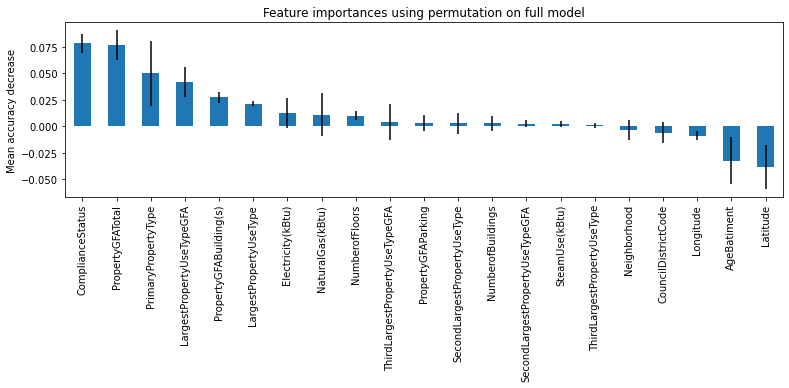

In [101]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(12
                    , 10.5)
plt.show()

# 2ème Partie : Avec EnergyStarScore

In [102]:
X_ess = df.drop(['log_SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],axis=1)
y_ess = df['log_SiteEnergyUse(kBtu)']

In [103]:
X_ess_train, X_ess_test, y_ess_train, y_ess_test = train_test_split(X_ess, y_ess,test_size=0.2,random_state=0)

In [104]:
X_ess_train.shape

(1319, 22)

In [105]:
X_ess_test.shape

(330, 22)

In [106]:
X_ess_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,NaN,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,69.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,NaN,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,67.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,NaN,0.0,0.0,1.0,Compliant,61


#### Imputation des valeurs manquantes pour l'EnergyStarScore

In [107]:
ess_train_median = X_ess_train['ENERGYSTARScore'].median() 
ess_train_median

73.0

In [108]:
X_ess_train['ENERGYSTARScore'].fillna(ess_train_median, inplace = True)

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [109]:
X_ess_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,73.0,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,69.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,73.0,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,67.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,73.0,0.0,0.0,1.0,Compliant,61


In [110]:
X_ess_test['ENERGYSTARScore'].fillna(ess_train_median, inplace = True)

C:\Users\alexa\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [111]:
# Encodage/scaling de nos données en fonction de leur type


col_num_int2 = list(X_ess.select_dtypes(include=["int64"]))
col_num_float2 = list(X_ess.select_dtypes(include=["float64"]))
col_cat2 = list(X_ess.select_dtypes(include=["object"]))



ohe = OneHotEncoder(handle_unknown = 'ignore')
scaler = StandardScaler()
col_num_int_pipe = Pipeline(steps = [('scaler', scaler)])

col_cat_pipe = Pipeline(steps = [('OneHot', ohe)])


preprocessor2 = ColumnTransformer(transformers=[('ints', col_num_int_pipe, col_num_int2),
       ('floats', col_num_int_pipe, col_num_float2),
       ('category', col_cat_pipe, col_cat2)])


# Création des pipelines pour chacun des modèles testés

from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
svr2 = Pipeline(steps=[('preprocessing',preprocessor2),('SVR',SVR())])
elastic2 = Pipeline(steps=[('preprocessing',preprocessor2),('elastic', ElasticNet())])
linear_reg2 = Pipeline(steps=[('preprocessing',preprocessor2),('linear_reg',linear_model.LinearRegression())])
ridge_reg2 = Pipeline(steps=[('preprocessing',preprocessor2),('ridge_reg', Ridge())])
rfr2 = Pipeline(steps=[('preprocessing',preprocessor2),('RFR',RandomForestRegressor(random_state=0))])
knn2 = Pipeline(steps=[('preprocessing',preprocessor2),('kNN',KNeighborsRegressor())])
ada2 = Pipeline(steps=[('preprocessing',preprocessor2),('ADA',AdaBoostRegressor(random_state=0,))])
dummy2 = Pipeline(steps=[('preprocessing',preprocessor2),('dummy',DummyRegressor(strategy='mean'))])
gradient2 = Pipeline(steps=[('preprocessing',preprocessor2),('GradientBoosting', GradientBoostingRegressor())])

## Recherche des hyperparamètres optimaux pour chacune des catégories de modèles

#### ElasticNet

In [112]:
X_ess_train.shape

(1319, 22)

In [113]:
X_train.shape

(1319, 21)

In [114]:
parameters_ess_elastic = {'elastic__tol' : [0.1,0.01,0.001,0.0001], #seuil de tolérance de modification des poids pour que 
                                                       #l'algorithme converge
              "elastic__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  #poids du terme de pénalité
              "elastic__l1_ratio": [0, 0.2,0.4,0.6,0.8,1]} #0 = Ridge / 1= Lasso
elastic_ess_search = GridSearchCV(elastic2,
                               param_grid = parameters_ess_elastic,
                              scoring= 'neg_mean_squared_error',
                              verbose=3,
                               cv=5)

elastic_ess_search_cv = elastic_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour le ElasticNet_ess sont: {}".format(elastic_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(elastic_ess_search_cv.best_score_))

Fitting 5 folds for each of 168 candidates, totalling 840 fits


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094.1542248340018, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.984 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 928.7324282523696, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.838 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.1561481920319, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-6.106 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179.4032690772822, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918.0832227146157, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.255 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094.1542248340018, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.984 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 928.7324282523696, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.838 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.1561481920319, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-6.106 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179.4032690772822, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918.0832227146157, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.255 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094.1542248340018, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.984 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 928.7324282523696, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.838 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.1561481920319, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-6.106 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179.4032690772822, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.592 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918.0832227146157, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.255 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1094.1542248340018, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.984 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 928.7324282523696, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.838 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1051.1561481920319, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-6.106 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179.4032690772822, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.592 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 918.0832227146157, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.255 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.986 total time=   0.4s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.842 total time=   0.4s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-6.113 total time=   0.4s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.591 total time=   0.3s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.223 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.11617330101876, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1.986 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.40551025850846, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.842 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.76934687669632, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-6.113 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.71867603468058, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1.592 total time=   0.6s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.253 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.11617330101876, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1.986 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.40551025850846, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-3.842 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.76934687669632, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-6.113 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.71867603468058, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.74346725822238, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-4.254 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.11617330101876, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1.986 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.40551025850846, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-3.842 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189.76934687669632, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-6.113 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131.71867603468058, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1.592 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.74346725822238, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-4.254 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1.988 total time=   0.3s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-3.847 total time=   0.3s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-6.122 total time=   0.3s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1.590 total time=   0.2s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-4.203 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.37609757370387, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1.988 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.3586041477431, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-3.847 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.92559881078796, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-6.121 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.43265662275303, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1.591 total time=   0.5s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-4.225 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.37609757370387, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1.988 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.3586041477431, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-3.847 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.92559881078796, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-6.121 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.43265662275303, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-1.591 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.297203417335368, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.001;, score=-4.249 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 197.37609757370387, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1.988 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140.3586041477431, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-3.847 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141.92559881078796, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-6.121 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94.43265662275303, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1.591 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.297203417335368, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-4.249 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1.990 total time=   0.2s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-3.855 total time=   0.2s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-6.132 total time=   0.1s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1.590 total time=   0.2s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-4.184 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.01520298477294, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1.991 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.70628990390219, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-3.855 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.91843875855534, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-6.129 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.64364680538824, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1.590 total time=   0.6s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-4.205 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.01520298477294, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1.991 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.70628990390219, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-3.855 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.91843875855534, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-6.129 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.64364680538824, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-1.590 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6826402477443025, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.001;, score=-4.236 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.01520298477294, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1.991 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.70628990390219, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-3.855 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112.91843875855534, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-6.129 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.64364680538824, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1.590 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6826402477443025, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-4.236 total time=   0.5s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1.993 total time=   0.1s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-3.861 total time=   0.2s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-6.148 total time=   0.0s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1.590 total time=   0.2s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-4.168 total time=   0.0s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1.994 total time=   0.6s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-3.863 total time=   0.4s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-6.138 total time=   0.1s
[CV 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.116890914161104, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1.994 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.61950928118108, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-3.863 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.92711836355602, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-6.136 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.578909129620115, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-1.590 total time=   0.5s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-4.195 total time=   0.3s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.116890914161104, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.994 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.61950928118108, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.863 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.92711836355602, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-6.136 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.578909129620115, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.590 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.632654712508838, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.209 total time=   0.4s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.997 total time=   0.1s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.868 total time=   0.1s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-6.159 total time=   0.0s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.590 total time=   0.1s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.156 total time=   0.0s
[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1.997 total time=   0.4s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.869 total time=   0.3s
[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-6.149 total time=   0.1s
[CV 4/5] END elastic

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.125320726433529, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1.997 total time=   0.5s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-3.869 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.720173476981245, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-6.149 total time=   0.5s
[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-1.590 total time=   0.4s
[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.001;, score=-4.155 total time=   0.2s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.125320726433529, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1.997 total time=   0.5s
[CV 2/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-3.869 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.720173476981245, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-6.149 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.921297341040372, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1.590 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.625092184282721, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.0001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-4.155 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1157.3783763284932, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.958 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987.8352695211264, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.624 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.5522775575312, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-6.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241.355701731456, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.555 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.8213879145169, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.235 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1157.3783763284932, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.958 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987.8352695211264, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.624 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.5522775575312, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-6.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241.355701731456, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.555 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.8213879145169, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.235 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1157.3783763284932, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.958 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987.8352695211264, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.624 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.5522775575312, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-6.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241.355701731456, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.555 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.8213879145169, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.235 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1157.3783763284932, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.958 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 987.8352695211264, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.624 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1115.5522775575312, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-6.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1241.355701731456, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.555 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 948.8213879145169, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.235 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.960 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.608 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-6.442 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.552 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.236 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-1.960 total time=   0.2s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.609 total time=   0.2s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-6.434 total time=   0.0s
[CV 4/5] END el

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.772589339683236, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-1.551 total time=   0.5s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.001;, score=-4.240 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.215506121227463, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1.960 total time=   0.5s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-3.609 total time=   0.5s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-6.427 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.772589339683236, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-1.551 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5996708905154264, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.2, elastic__tol=0.0001;, score=-4.240 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1.963 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-3.598 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-6.518 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-1.549 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.1;, score=-4.212 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-1.964 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-3.599 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.01;, score=-6.492 total time=   0.0s
[CV 4/5] END 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7654114804595338, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1.964 total time=   0.5s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-3.599 total time=   0.5s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-6.479 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6927380202992026, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-1.547 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3978318002466494, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.4, elastic__tol=0.0001;, score=-4.245 total time=   0.5s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1.970 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-3.589 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-6.603 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-1.543 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.1;, score=-4.191 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-1.971 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-3.589 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.01;, score=-6.557 total time=   0.0s
[CV 4/5] END 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.781181418044071, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1.971 total time=   0.5s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-3.590 total time=   0.4s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-6.540 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4115240676210306, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-1.540 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3918168051181965, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.6, elastic__tol=0.0001;, score=-4.254 total time=   0.4s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1.980 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-3.583 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-6.695 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-1.533 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.1;, score=-4.179 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-1.981 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-3.585 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.01;, score=-6.635 total time=   0.0s
[CV 4/5] END 

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0327814713723455, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.981 total time=   0.5s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.585 total time=   0.3s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-6.618 total time=   0.1s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6672828937594204, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.529 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.681569642297063, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.266 total time=   0.4s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.998 total time=   0.0s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.588 total time=   0.0s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-6.762 total time=   0.0s
[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.517 total time=   0.0s
[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.165 total time=   0.0s
[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1.999 total time=   0.1s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.591 total time=   0.1s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.01;, score=-6.679 total time=   0.0s
[CV 4/5] END elastic__alpha=0

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.244541536558245, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-2.000 total time=   0.4s
[CV 2/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-3.591 total time=   0.3s
[CV 3/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-6.670 total time=   0.0s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.457864997768411, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-1.514 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1760080650035434, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.001, elastic__l1_ratio=1, elastic__tol=0.0001;, score=-4.167 total time=   0.4s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294.3287579230616, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.052 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1114.6712965457466, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.645 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257.2596572470968, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-7.454 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1394.0110779239048, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.474 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039.761818322574, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.302 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294.3287579230616, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.052 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1114.6712965457466, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.645 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257.2596572470968, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-7.454 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1394.0110779239048, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.474 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039.761818322574, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.302 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294.3287579230616, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.052 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1114.6712965457466, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.645 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257.2596572470968, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-7.454 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1394.0110779239048, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.474 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039.761818322574, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.302 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1294.3287579230616, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.052 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1114.6712965457466, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.645 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1257.2596572470968, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-7.454 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1394.0110779239048, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.474 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1039.761818322574, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.302 total time=   0.5s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2.073 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.647 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-7.832 total time=   0.0s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.475 total time=   0.0s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.331 total time=   0.0s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2.074 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.647 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-7.767 total time=   0.0s
[CV 4/5] END elastic__al

[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.001;, score=-4.409 total time=   0.0s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-2.118 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.708 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-7.826 total time=   0.0s
[CV 4/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.476 total time=   0.0s
[CV 5/5] END elastic__alpha=0.01, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.408 total time=   0.0s
[CV 1/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-2.132 total time=   0.0s
[CV 2/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.757 total time=   0.0s
[CV 3/5] END elastic__alpha=0.01, elastic__l1_ratio=1, elastic__tol=0.1;, score=-7.629 total time=   0.0s
[CV 4/5] END elas

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488.0388989362216, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.288 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.500208581788, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.907 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1453.5828364884142, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-7.238 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1636.4776249275528, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.229 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.4943862794441, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.619 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488.0388989362216, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.288 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.500208581788, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.907 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1453.5828364884142, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-7.238 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1636.4776249275528, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.229 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.4943862794441, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.619 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488.0388989362216, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.288 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.500208581788, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.907 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1453.5828364884142, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-7.238 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1636.4776249275528, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.229 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.4943862794441, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.619 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1488.0388989362216, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.288 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292.500208581788, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.907 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1453.5828364884142, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-7.238 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1636.4776249275528, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.229 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1209.4943862794441, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.619 total time=   0.5s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-2.425 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.068 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-6.498 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.208 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.796 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-2.425 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.065 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-6.753 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, 

[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.807 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.177 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-5.292 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-2.700 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.418 total time=   0.0s
[CV 3/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.301 total time=   0.0s
[CV 4/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.180 total time=   0.0s
[CV 5/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.445 total time=   0.0s
[CV 1/5] END elastic__alpha=0.1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-2.702 total time=   0.0s
[CV 2/5] END elastic__alpha=0.1, elasti

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.1151854130414, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.682 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1535.1930887827534, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.245 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.305447885184, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.322 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955.4646697488367, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.002 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435.7697038415956, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-5.086 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.1151854130414, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.682 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1535.1930887827534, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.245 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.305447885184, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.322 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955.4646697488367, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.002 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435.7697038415956, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.01;, score=-5.086 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.1151854130414, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.682 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1535.1930887827534, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.245 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.305447885184, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.322 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955.4646697488367, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.002 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435.7697038415956, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.001;, score=-5.086 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.1151854130414, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.682 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1535.1930887827534, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.245 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.305447885184, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.322 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955.4646697488367, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.002 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435.7697038415956, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-5.086 total time=   0.5s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.123 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.576 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.279 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.171 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-5.545 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.123 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.576 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.270 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0.

[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.01;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0.001;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=1, elastic__tol=0

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.0378483884429, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.292 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.6333174445786, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.671 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.9396722198703, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-2.990 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2230.6729297145193, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.265 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687.0297037865562, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.1;, score=-5.480 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.0378483884429, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.292 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.6333174445786, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.671 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.9396722198703, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-2.990 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2230.6729297145193, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.265 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687.0297037865562, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.01;, score=-5.480 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.0378483884429, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.292 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.6333174445786, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.671 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.9396722198703, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-2.990 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2230.6729297145193, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.265 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687.0297037865562, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.001;, score=-5.480 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1968.0378483884429, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.292 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1787.6333174445786, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.671 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1962.9396722198703, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-2.990 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2230.6729297145193, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.265 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1687.0297037865562, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-5.480 total time=   0.5s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l

[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=10, elastic__l1_ratio=1, elastic__tol=0.01;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=10, elastic__l1_ratio=1, elasti

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2049.8352119528054, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.609 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.5841610500001, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-4.906 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.0060466454047, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-3.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.3380254969766, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-1.535 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1786.8450605154223, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.1;, score=-5.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2049.8352119528054, tolerance: 41.242281522371584
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.609 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.5841610500001, tolerance: 37.84470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-4.906 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.0060466454047, tolerance: 41.646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-3.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.3380254969766, tolerance: 46.74196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-1.535 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1786.8450605154223, tolerance: 36.0435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.01;, score=-5.641 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2049.8352119528054, tolerance: 4.124228152237158
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.609 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.5841610500001, tolerance: 3.7844701477046474
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-4.906 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.0060466454047, tolerance: 4.164659846234748
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-3.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.3380254969766, tolerance: 4.674196886898299
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-1.535 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1786.8450605154223, tolerance: 3.60435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.001;, score=-5.641 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2049.8352119528054, tolerance: 0.4124228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.609 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1878.5841610500001, tolerance: 0.3784470147704648
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-4.906 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2066.0060466454047, tolerance: 0.41646598462347484
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-3.385 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2323.3380254969766, tolerance: 0.46741968868982986
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-1.535 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1786.8450605154223, tolerance: 0.360435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0, elastic__tol=0.0001;, score=-5.641 total time=   0.6s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.2, elastic__tol=0.01;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, 

[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=0.8, elastic__tol=0.0001;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.662 total time=   0.0s
[CV 2/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-4.945 total time=   0.0s
[CV 3/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-3.504 total time=   0.0s
[CV 4/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-1.585 total time=   0.0s
[CV 5/5] END elastic__alpha=100, elastic__l1_ratio=1, elastic__tol=0.1;, score=-5.668 total time=   0.0s
[CV 1/5] END elastic__alpha=100, el

C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2112.4823290414183, tolerance: 508.98098710202834
  model = cd_fast.sparse_enet_coordinate_descent(


In [115]:
# Récupèration du score r2 à partir de la grille optimale
# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_elastic_opti = {key :[value] for key,value in elastic_ess_search_cv.best_params_.items()}
parameters_ess_elastic_opti


start_time7 = time.time()
elastic_ess_search_opti = GridSearchCV(elastic2,
                               param_grid = parameters_ess_elastic_opti,
                              scoring= 'r2',
                              verbose=3,
                               cv=5)

elastic_ess_search_r2 = elastic_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time7 = time.time() - start_time7
print("Les meilleurs hyper-paramètres pour le ElasticNet sont: {}".format(elastic_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(elastic_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time7:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1738.1151854130414, tolerance: 412.4228152237159
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 1/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.263 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1535.1930887827534, tolerance: 378.44701477046476
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 2/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.141 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1710.305447885184, tolerance: 416.46598462347487
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 3/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=-0.234 total time=   0.5s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1955.4646697488367, tolerance: 467.41968868982985
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 4/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.346 total time=   0.6s


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1435.7697038415956, tolerance: 360.435661998309
  model = cd_fast.sparse_enet_coordinate_descent(


[CV 5/5] END elastic__alpha=1, elastic__l1_ratio=0, elastic__tol=0.1;, score=0.087 total time=   0.6s
Les meilleurs hyper-paramètres pour le ElasticNet sont: {'elastic__alpha': 1, 'elastic__l1_ratio': 0, 'elastic__tol': 0.1}
Le meilleur score est 0.12077566955915138
Elapsed time to compute the importances: 4.101 seconds


C:\Users\alexa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2112.4823290414183, tolerance: 508.98098710202834
  model = cd_fast.sparse_enet_coordinate_descent(


In [116]:
parameters_ess_elastic_opti

{'elastic__alpha': [1], 'elastic__l1_ratio': [0], 'elastic__tol': [0.1]}

In [117]:
start_elastic_ess = time.time()
y_pred = elastic_ess_search_r2.predict(X_ess_train)
end_elastic_ess = time.time()

predict_time_elastic_ess = end_elastic_ess - start_elastic_ess

In [118]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['ElasticNet_ess'],
    'Score_RMSE' : [np.sqrt(-elastic_ess_search_cv.best_score_)],
    'Score_R2' : [elastic_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time7],
    'TempsPrédictionOpti' : [predict_time_elastic_ess]}),
              ignore_index=True)

In [119]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
6,ElasticNet_ess,1.862137,0.120776,4.100531,0.012988


#### RandomForestRegressor

In [120]:
X_ess_train.head()

,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,AgeBatiment
887,Other,7,magnolia / queen anne,47.61974,-122.35110,1.0,1,155795,0,155795,Other,155795.0,Aucune,0.0,Unknown,0.0,73.0,0.0,1.0,0.0,Compliant,54
1397,Warehouse,5,northwest,47.70833,-122.34429,1.0,1,29400,0,29400,Non-Refrigerated Warehouse,25000.0,Aucune,0.0,Unknown,0.0,69.0,0.0,1.0,0.0,Compliant,44
27,K-12 School,3,central,47.62266,-122.30547,1.0,1,126351,0,126351,K-12 School,126351.0,Aucune,0.0,Unknown,0.0,73.0,1.0,0.0,0.0,Unknown,61
1514,Retail Store,2,downtown,47.59951,-122.32033,1.0,3,54969,0,54969,Retail Store,54969.0,Aucune,0.0,Unknown,0.0,67.0,0.0,1.0,0.0,Compliant,16
655,Restaurant,7,downtown,47.61468,-122.34925,1.0,2,31020,0,31020,Restaurant,31020.0,Aucune,0.0,Unknown,0.0,73.0,0.0,0.0,1.0,Compliant,61


In [121]:
parameters_ess_rfr = {'RFR__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'RFR__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'RFR__max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}
    
rfr_ess_search = GridSearchCV(rfr2,
                               param_grid = parameters_ess_rfr,
                              verbose=3,
                              scoring = 'neg_mean_squared_error',
                               cv=5)

rfr_ess_search_cv = rfr_ess_search.fit(X_ess_train, y_ess_train)

print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(rfr_ess_search_cv.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-0.933 total time=   0.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-3.041 total time=   0.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-2.158 total time=   0.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-0.688 total time=   0.2s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=10;, score=-2.864 total time=   0.2s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-0.737 total time=   1.2s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-2.472 total time=   1.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=1, RFR__n_estimators=50;, score=-1.631 total time=   1.2s
[C

[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-0.985 total time=   6.1s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-2.209 total time=   6.2s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-2.181 total time=   6.2s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-0.980 total time=   6.0s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=5, RFR__n_estimators=500;, score=-3.054 total time=   6.0s
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=10, RFR__n_estimators=10;, score=-1.494 total time=   0.0s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=10, RFR__n_estimators=10;, score=-2.849 total time=   0.0s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=10, RFR__n_estimators=10;, score=-2.373 total time=   0.0s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_le

[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-1.650 total time=   0.6s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-3.165 total time=   0.7s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-1.805 total time=   0.7s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-0.669 total time=   0.7s
[CV 5/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=300;, score=-3.887 total time=   0.7s
[CV 1/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=500;, score=-1.622 total time=   1.2s
[CV 2/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=500;, score=-3.223 total time=   1.1s
[CV 3/5] END RFR__max_features=sqrt, RFR__min_samples_leaf=3, RFR__n_estimators=500;, score=-1.799 total time=   1.2s
[CV 4/5] END RFR__max_features=sqrt, RFR__min_samples_le

In [122]:
### Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_rfr_opti = {key :[value] for key,value in rfr_ess_search_cv.best_params_.items()}
parameters_ess_rfr_opti




start_time8 = time.time()
rfr_ess_search_opti = GridSearchCV(rfr2,
                               param_grid = parameters_ess_rfr_opti,
                              verbose=3,
                              scoring = 'r2',
                               cv=5)

rfr_ess_search_r2 = rfr_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time8 = time.time() - start_time8
print("Les meilleurs hyper-paramètres pour le RFR sont: {}".format(rfr_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(rfr_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time8:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END RFR__max_features=auto, RFR__min_samples_leaf=3, RFR__n_estimators=50;, score=0.781 total time=   0.7s
[CV 2/5] END RFR__max_features=auto, RFR__min_samples_leaf=3, RFR__n_estimators=50;, score=0.565 total time=   0.7s
[CV 3/5] END RFR__max_features=auto, RFR__min_samples_leaf=3, RFR__n_estimators=50;, score=0.555 total time=   0.7s
[CV 4/5] END RFR__max_features=auto, RFR__min_samples_leaf=3, RFR__n_estimators=50;, score=0.611 total time=   0.7s
[CV 5/5] END RFR__max_features=auto, RFR__min_samples_leaf=3, RFR__n_estimators=50;, score=0.546 total time=   0.7s
Les meilleurs hyper-paramètres pour le RFR sont: {'RFR__max_features': 'auto', 'RFR__min_samples_leaf': 3, 'RFR__n_estimators': 50}
Le meilleur score est 0.6116117726617374
Elapsed time to compute the importances: 4.989 seconds


In [123]:
start_rfr_ess = time.time()
y_pred = rfr_ess_search_r2.predict(X_ess_train)
end_rfr_ess = time.time()

predict_time_rfr_ess = end_rfr_ess - start_rfr_ess

In [124]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['RandomForestReg_ess'],
    'Score_RMSE' : [np.sqrt(-rfr_ess_search_cv.best_score_)],
    'Score_R2' : [rfr_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time8],
    'TempsPrédictionOpti' :[predict_time_rfr_ess]}),
              ignore_index=True)

In [125]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
6,ElasticNet_ess,1.862137,0.120776,4.100531,0.012988
7,RandomForestReg_ess,1.235533,0.611612,4.989274,0.026069


#### SupportVectorRegressor

In [126]:
parameters_ess_svr = {'SVR__gamma' : [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1], 
              'SVR__epsilon' : [0.001, 0.01, 0.1, 1], #erreur acceptée par l'algorithme
              'SVR__C' : [0.001, 0.01, 0.1, 1, 10]} #parametre de régularisation
svr_ess_search = GridSearchCV(svr2, 
                      param_grid = parameters_ess_svr,
                      cv=5,
                        scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

svr_ess_search_cv = svr_ess_search.fit(X_ess_train, y_ess_train)

print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(svr_ess_search_cv.best_score_))


Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-3.679 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-1.571 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-08;, score=-5.627 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-3.679 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gamma=1e-07;, score=-1.571 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.001, SVR__gam

[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-08;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-3.681 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-3.505 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-1.573 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-07;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-3.681 total time=   0.0s
[CV 2/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-3.505 total time=   0.0s
[CV 4/5] END SVR__C=0.001, SVR__epsilon=0.1, SVR__gamma=1e-06;, score=-1.573 total time=   0.0s
[CV 5/5] END SVR__C=0.001, SVR__epsilon=

[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-1.571 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-06;, score=-5.627 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-3.678 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-4.943 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-3.503 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-1.570 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=1e-05;, score=-5.626 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.001, SVR__gamma=0.0001;, score=-3.673 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR

[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-3.504 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-1.573 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=1e-05;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-3.676 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-4.940 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-3.496 total time=   0.0s
[CV 4/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-1.568 total time=   0.0s
[CV 5/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.0001;, score=-5.622 total time=   0.0s
[CV 1/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-3.629 total time=   0.0s
[CV 2/5] END SVR__C=0.01, SVR__epsilon=0.1, SVR__gamma=0.001;, score=-4.907 total time=   0.0s
[CV 3/5] END SVR__C=0.01, SVR__epsilon=0.1, S

[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-3.245 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-4.625 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-2.974 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-1.182 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.001;, score=-5.496 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-2.662 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-4.146 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-2.536 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-0.743 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.001, SVR__gamma=0.01;, score=-5.108 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.001, 

[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-0.745 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.01;, score=-5.131 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-2.790 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-4.198 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-2.641 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-0.857 total time=   0.0s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__gamma=0.1;, score=-5.002 total time=   0.0s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-3.640 total time=   0.0s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-4.966 total time=   0.0s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-3.534 total time=   0.0s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=1, SVR__gamma=1e-08;, score=-1.537 total

[CV 3/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-08;, score=-3.505 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-08;, score=-1.572 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-08;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-3.678 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-4.944 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-3.503 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-1.572 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-07;, score=-5.624 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-3.673 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-4.940 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=0.01, SVR__gamma=1e-06;, score=-3.

[CV 1/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-3.596 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-4.935 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-3.433 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-1.493 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=1e-05;, score=-5.736 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-3.299 total time=   0.0s
[CV 2/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-4.710 total time=   0.0s
[CV 3/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-3.054 total time=   0.0s
[CV 4/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-1.202 total time=   0.0s
[CV 5/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.0001;, score=-5.651 total time=   0.0s
[CV 1/5] END SVR__C=1, SVR__epsilon=1, SVR__gamma=0.001;, score=-2.755 total time=   0.0s
[CV 2

[CV 4/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.0001;, score=-0.778 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.0001;, score=-5.512 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-2.334 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-3.793 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-2.745 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-0.495 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.001;, score=-5.022 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, score=-1.877 total time=   0.1s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, score=-3.537 total time=   0.1s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, score=-1.943 total time=   0.1s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.01, SVR__gamma=0.01;, 

[CV 3/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=-1.877 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=-0.637 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.01;, score=-4.122 total time=   0.0s
[CV 1/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-1.804 total time=   0.0s
[CV 2/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-3.381 total time=   0.0s
[CV 3/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-1.661 total time=   0.0s
[CV 4/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-0.831 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=1, SVR__gamma=0.1;, score=-3.782 total time=   0.0s
Les meilleurs hyper-paramètres pour la SVR sont: {'SVR__C': 10, 'SVR__epsilon': 0.1, 'SVR__gamma': 0.1}
Le meilleur score est -2.186724548584255


In [127]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_svr_opti = {key :[value] for key,value in svr_ess_search_cv.best_params_.items()}
parameters_ess_svr_opti


start_time9 = time.time()
svr_ess_search_opti = GridSearchCV(svr2, 
                      param_grid = parameters_ess_svr_opti,
                      cv=5,
                        scoring = 'r2',
                   verbose=3
                     )

svr_ess_search_r2 = svr_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time9 = time.time() - start_time9
print("Les meilleurs hyper-paramètres pour la SVR sont: {}".format(svr_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(svr_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time9:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.555 total time=   0.1s
[CV 2/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.326 total time=   0.1s
[CV 3/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.545 total time=   0.1s
[CV 4/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.614 total time=   0.0s
[CV 5/5] END SVR__C=10, SVR__epsilon=0.1, SVR__gamma=0.1;, score=0.318 total time=   0.1s
Les meilleurs hyper-paramètres pour la SVR sont: {'SVR__C': 10, 'SVR__epsilon': 0.1, 'SVR__gamma': 0.1}
Le meilleur score est 0.471675280715818
Elapsed time to compute the importances: 1.000 seconds


In [128]:
start_svr_ess = time.time()
y_pred = svr_ess_search_r2.predict(X_ess_train)
end_svr_ess = time.time()

predict_time_svr_ess = end_svr_ess - start_svr_ess

In [129]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['SupportVectorReg_ess'],
    'Score_RMSE' : [np.sqrt(-svr_ess_search_cv.best_score_)],
    'Score_R2' : [svr_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time9],
    'TempsPrédictionOpti' :[predict_time_svr_ess]}),
              ignore_index=True)

In [130]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
6,ElasticNet_ess,1.862137,0.120776,4.100531,0.012988
7,RandomForestReg_ess,1.235533,0.611612,4.989274,0.026069
8,SupportVectorReg_ess,1.478758,0.471675,0.999562,0.093899


#### Adaboost

In [131]:
parameters_ess_ada = {"ADA__n_estimators": [20,30,50,70],
              "ADA__learning_rate": [0.5, 1, 2, 3],
              "ADA__loss": ['linear', 'square', 'exponential'], 
              }
ada_ess_search = GridSearchCV(ada2, 
                      param_grid = parameters_ess_ada,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

ada_ess_search_cv = ada_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(ada_ess_search_cv.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-0.774 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-1.620 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-1.557 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-0.597 total time=   0.0s
[CV 5/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=20;, score=-1.813 total time=   0.0s
[CV 1/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-0.761 total time=   0.0s
[CV 2/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-1.616 total time=   0.0s
[CV 3/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA__n_estimators=30;, score=-1.510 total time=   0.0s
[CV 4/5] END ADA__learning_rate=0.5, ADA__loss=linear, ADA

[CV 1/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-0.703 total time=   0.2s
[CV 2/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-1.573 total time=   0.2s
[CV 3/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-1.506 total time=   0.0s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-0.614 total time=   0.2s
[CV 5/5] END ADA__learning_rate=1, ADA__loss=linear, ADA__n_estimators=70;, score=-1.784 total time=   0.0s
[CV 1/5] END ADA__learning_rate=1, ADA__loss=square, ADA__n_estimators=20;, score=-0.819 total time=   0.0s
[CV 2/5] END ADA__learning_rate=1, ADA__loss=square, ADA__n_estimators=20;, score=-0.725 total time=   0.0s
[CV 3/5] END ADA__learning_rate=1, ADA__loss=square, ADA__n_estimators=20;, score=-1.548 total time=   0.0s
[CV 4/5] END ADA__learning_rate=1, ADA__loss=square, ADA__n_estimators=20;, score=-0.680 total time=   0.0s
[CV 5/5] END ADA__learning_r

[CV 1/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-3.997 total time=   0.0s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-2.849 total time=   0.1s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-3.979 total time=   0.0s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-2.700 total time=   0.0s
[CV 5/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=50;, score=-3.845 total time=   0.1s
[CV 1/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=70;, score=-3.998 total time=   0.1s
[CV 2/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=70;, score=-2.002 total time=   0.1s
[CV 3/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=70;, score=-3.110 total time=   0.1s
[CV 4/5] END ADA__learning_rate=2, ADA__loss=square, ADA__n_estimators=70;, score=-1.445 total time=   0.1s
[CV 5/5] END ADA__learning_r

[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=30;, score=-0.872 total time=   0.0s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=30;, score=-0.696 total time=   0.0s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=30;, score=-1.495 total time=   0.0s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=30;, score=-0.607 total time=   0.0s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=30;, score=-1.710 total time=   0.0s
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=50;, score=-0.720 total time=   0.1s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=50;, score=-0.718 total time=   0.1s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=50;, score=-1.456 total time=   0.1s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=50;, score=-0.573 to

In [132]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_ada_opti = {key :[value] for key,value in ada_ess_search_cv.best_params_.items()}
parameters_ess_ada_opti


start_time10 = time.time()
ada_ess_search_opti = GridSearchCV(ada2, 
                      param_grid = parameters_ess_ada_opti,
                      cv=5,
                          scoring = 'r2',
                   verbose=3
                     )

ada_ess_search_r2 = ada_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time10 = time.time() - start_time10
print("Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {}".format(ada_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(ada_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time10:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=70;, score=0.806 total time=   0.2s
[CV 2/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=70;, score=0.859 total time=   0.2s
[CV 3/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=70;, score=0.592 total time=   0.2s
[CV 4/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=70;, score=0.640 total time=   0.1s
[CV 5/5] END ADA__learning_rate=3, ADA__loss=exponential, ADA__n_estimators=70;, score=0.711 total time=   0.1s
Les meilleurs hyper-paramètres pour la modélisation Adaboost sont: {'ADA__learning_rate': 3, 'ADA__loss': 'exponential', 'ADA__n_estimators': 70}
Le meilleur score est 0.7215221532404816
Elapsed time to compute the importances: 1.565 seconds


In [133]:
start_ada_ess = time.time()
y_pred = ada_ess_search_r2.predict(X_ess_train)
end_ada_ess = time.time()

predict_time_ada_ess = end_ada_ess - start_ada_ess

In [134]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['Adaboost_ess'],
    'Score_RMSE' : [np.sqrt(-ada_ess_search_cv.best_score_)],
    'Score_R2' : [ada_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time10],
    'TempsPrédictionOpti': [predict_time_ada_ess]}),
              ignore_index=True)

In [135]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
6,ElasticNet_ess,1.862137,0.120776,4.100531,0.012988
7,RandomForestReg_ess,1.235533,0.611612,4.989274,0.026069
8,SupportVectorReg_ess,1.478758,0.471675,0.999562,0.093899
9,Adaboost_ess,0.999321,0.721522,1.565035,0.028923


In [136]:
import pickle
pickle.dump(ada_ess_search_r2, open('ada_ess_search_r2.pickle', 'wb'))
pic_ada_ess_search2 = pickle.load(open('ada_ess_search_r2.pickle', 'rb'))

#### K-NearestNeighbours

In [137]:
parameters_ess_knn = {"kNN__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9]
              }
knn_ess_search = GridSearchCV(knn2, 
                      param_grid = parameters_ess_knn,
                      cv=5,scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

knn_ess_search_cv = knn_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(knn_ess_search_cv.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...............kNN__n_neighbors=2;, score=-2.249 total time=   0.0s
[CV 2/5] END ...............kNN__n_neighbors=2;, score=-3.352 total time=   0.0s
[CV 3/5] END ...............kNN__n_neighbors=2;, score=-1.856 total time=   0.0s
[CV 4/5] END ...............kNN__n_neighbors=2;, score=-1.320 total time=   0.0s
[CV 5/5] END ...............kNN__n_neighbors=2;, score=-4.999 total time=   0.0s
[CV 1/5] END ...............kNN__n_neighbors=3;, score=-1.676 total time=   0.0s
[CV 2/5] END ...............kNN__n_neighbors=3;, score=-3.070 total time=   0.0s
[CV 3/5] END ...............kNN__n_neighbors=3;, score=-2.106 total time=   0.0s
[CV 4/5] END ...............kNN__n_neighbors=3;, score=-0.990 total time=   0.0s
[CV 5/5] END ...............kNN__n_neighbors=3;, score=-4.449 total time=   0.0s
[CV 1/5] END ...............kNN__n_neighbors=4;, score=-1.482 total time=   0.0s
[CV 2/5] END ...............kNN__n_neighbors=4;, 

In [138]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_knn_opti = {key :[value] for key,value in knn_ess_search_cv.best_params_.items()}
parameters_ess_knn_opti


start_time11 = time.time()
knn_ess_search_opti = GridSearchCV(knn2, 
                      param_grid = parameters_ess_knn_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

knn_ess_search_r2 = knn_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time11 = time.time() - start_time11
print("Les meilleurs hyper-paramètres pour le k-NN sont: {}".format(knn_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(knn_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time11:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ................kNN__n_neighbors=3;, score=0.540 total time=   0.0s
[CV 2/5] END ................kNN__n_neighbors=3;, score=0.379 total time=   0.0s
[CV 3/5] END ................kNN__n_neighbors=3;, score=0.399 total time=   0.0s
[CV 4/5] END ................kNN__n_neighbors=3;, score=0.354 total time=   0.0s
[CV 5/5] END ................kNN__n_neighbors=3;, score=0.201 total time=   0.0s
Les meilleurs hyper-paramètres pour le k-NN sont: {'kNN__n_neighbors': 3}
Le meilleur score est 0.374592392513902
Elapsed time to compute the importances: 0.202 seconds


In [139]:
start_knn_ess = time.time()
y_pred = knn_ess_search_r2.predict(X_ess_train)
end_knn_ess = time.time()

predict_time_knn_ess = end_knn_ess - start_knn_ess

In [140]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['KNN_ess'],
    'Score_RMSE' : [np.sqrt(-knn_ess_search_cv.best_score_)],
    'Score_R2' : [knn_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time11],
    'TempsPrédictionOpti': [predict_time_knn_ess]}),
              ignore_index=True)

In [141]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
6,ElasticNet_ess,1.862137,0.120776,4.100531,0.012988
7,RandomForestReg_ess,1.235533,0.611612,4.989274,0.026069
8,SupportVectorReg_ess,1.478758,0.471675,0.999562,0.093899
9,Adaboost_ess,0.999321,0.721522,1.565035,0.028923


#### Gradient Boosting

In [142]:
parameters_ess_gradient = {'GradientBoosting__n_estimators' : [10,50,100,300,500], #nombre d'arbres de décision
    'GradientBoosting__min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'GradientBoosting__max_depth': [1, 2,3], #nombre de features observées pour chaque arbre
    'GradientBoosting__learning_rate' : [0.1, 0.5, 1, 2]
}

gradient_ess_search = GridSearchCV(gradient2, 
                      param_grid = parameters_ess_gradient,
                      cv=5,
                          scoring = 'neg_mean_squared_error',
                   verbose=3
                     )

gradient_ess_search_cv = gradient_ess_search.fit(X_ess_train, y_ess_train)
print("Les meilleurs hyper-paramètres pour la modélisation GradientBoosting sont: {}".format(gradient_ess_search_cv.best_params_))
print("Le meilleur score est {}".format(gradient_ess_search_cv.best_score_))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-2.819 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.211 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-2.759 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-1.095 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.994 total time=   0.0s
[

[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-4.048 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-1.673 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-3.251 total time=   0.5s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-1.819 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-1.141 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBo

[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-4.151 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.665 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-3.309 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.777 total time=   0.3s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-0.927 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.1, Gradi

[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-4.277 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.267 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-2.951 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.692 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-0.906 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoo

[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.548 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.381 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.798 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-0.894 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-4.162 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBo

[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-3.153 total time=   1.3s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-1.737 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-2.852 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-2.239 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-0.914 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosti

[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-0.439 total time=   0.7s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-2.584 total time=   0.7s
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-0.681 total time=   1.2s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-1.332 total time=   1.3s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-1.233 total time=   1.3s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBo

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-0.874 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-4.055 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-1.760 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-3.243 total time=   0.3s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-1.927 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBo

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-1.004 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-3.978 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-1.687 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-3.296 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-1.870 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoos

[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.917 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-1.557 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-2.772 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-1.595 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-0.611 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoostin

[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-0.693 total time=   0.9s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-2.928 total time=   0.9s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-1.325 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-3.661 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-1.683 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoost

[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.372 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-0.737 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-2.953 total time=   0.5s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-0.839 total time=   0.8s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-1.293 total time=   0.8s
[CV 3/5] END GradientBoosting__learning_rate=0.5, Gradi

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.654 total time=   0.2s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-1.588 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-0.878 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=100;, score=-2.141 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-0.910 total time=   0.7s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBo

[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.668 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.501 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-0.722 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.738 total time=   0.1s
[CV 1/5] END GradientBoosting__learning_rate=0.5, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-0.762 total time=   0.2s
[CV 2/5] END GradientBoosting__learning_rate=0.5, GradientB

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.865 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-3.290 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-2.037 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.473 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-4.173 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.735 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.261 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.946 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-0.999 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-3.938 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.111 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.964 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.726 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-0.993 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-5.021 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth

[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-0.901 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-2.307 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.738 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-1.227 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=50;, score=-2.312 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=10;, score=-2.490 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.046 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-2.130 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.907 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=50;, score=-1.434 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth

[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=500;, score=-2.831 total time=   1.4s
[CV 1/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-1.143 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-1.884 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-1.890 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=10;, score=-1.185 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=1, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=300;, score=-5.859 total time=   0.3s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-3.662 total time=   0.5s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-6.005 total time=   0.5s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-3.655 total time=   0.5s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=500;, score=-1.771 total time=   0.5s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=100;, score=-5.859 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-3.662 total time=   0.3s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-6.005 total time=   0.3s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-3.655 total time=   0.2s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=1, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=300;, score=-1.771 total time=   0.2s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=50;, score=-6.501 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-3.662 total time=   0.1s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-5.558 total time=   0.1s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-3.612 total time=   0.1s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=100;, score=-1.586 total time=   0.1s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_d

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=10;, score=-6.002 total time=   0.0s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-4.274 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-6.298 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-3.766 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=5, GradientBoosting__n_estimators=50;, score=-2.290 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=2, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=-6.025 total time=   0.9s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-2.845 total time=   0.0s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.237 total time=   0.0s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-7.049 total time=   0.0s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=1, GradientBoosting__n_estimators=10;, score=-4.662 total time=   0.0s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_dep

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=300;, score=-6.206 total time=   0.8s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-39.359 total time=   1.4s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-6.193 total time=   1.4s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-6.435 total time=   1.4s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=3, GradientBoosting__n_estimators=500;, score=-10.159 total time=   1.4s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__ma

[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=100;, score=-6.178 total time=   0.2s
[CV 1/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-10.140 total time=   0.8s
[CV 2/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-5.224 total time=   0.8s
[CV 3/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-4.006 total time=   0.8s
[CV 4/5] END GradientBoosting__learning_rate=2, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=300;, score=-1.776 total time=   0.8s
[CV 5/5] END GradientBoosting__learning_rate=2, GradientBoosting

In [143]:
# Récupèration du score r2 à partir de la grille optimale

# Dictionnaire pour stocker les hyperparamètres optimaux
parameters_ess_gradient_opti = {key :[value] for key,value in gradient_ess_search_cv.best_params_.items()}
parameters_ess_gradient_opti

    
start_time12 = time.time()
gradient_ess_search_opti = GridSearchCV(gradient2, 
                      param_grid = parameters_ess_gradient_opti,
                      cv=5,scoring = 'r2',
                   verbose=3
                     )

gradient_ess_search_r2 = gradient_ess_search_opti.fit(X_ess_train, y_ess_train)
elapsed_time12 = time.time() - start_time12
print("Les meilleurs hyper-paramètres pour le GradientBoosting sont: {}".format(gradient_ess_search_r2.best_params_))
print("Le meilleur score est {}".format(gradient_ess_search_r2.best_score_))
print(f"Elapsed time to compute the importances: {elapsed_time12:.3f} seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.836 total time=   1.3s
[CV 2/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.699 total time=   1.3s
[CV 3/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.624 total time=   1.3s
[CV 4/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.587 total time=   1.3s
[CV 5/5] END GradientBoosting__learning_rate=0.1, GradientBoosting__max_depth=3, GradientBoosting__min_samples_leaf=10, GradientBoosting__n_estimators=500;, score=0.698 total time=   1.2s
L

In [144]:
start_gradient_ess = time.time()
y_pred = gradient_ess_search_r2.predict(X_ess_train)
end_gradient_ess = time.time()

predict_time_gradient_ess = end_gradient_ess - start_gradient_ess

In [145]:
resultats_2 = resultats_2.append(pd.DataFrame({
    'Modèle' : ['GradientBoosting_ess'],
    'Score_RMSE' : [np.sqrt(-gradient_ess_search_cv.best_score_)],
    'Score_R2' : [gradient_ess_search_r2.best_score_],
    'Temps ApprentissageOpti' : [elapsed_time12],
    'TempsPrédictionOpti' : [predict_time_gradient_ess]}),
              ignore_index=True)

In [146]:
resultats_2

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
0,ElasticNet,1.876599,0.104165,4.100986,0.007955
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
2,SVR,1.509719,0.448467,1.021379,0.096375
3,Adaboost,1.555910,0.329899,1.778150,0.039972
4,KNN,1.591981,0.345548,0.199060,0.099233
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
6,ElasticNet_ess,1.862137,0.120776,4.100531,0.012988
7,RandomForestReg_ess,1.235533,0.611612,4.989274,0.026069
8,SupportVectorReg_ess,1.478758,0.471675,0.999562,0.093899
9,Adaboost_ess,0.999321,0.721522,1.565035,0.028923


In [147]:
resultats_2.sort_values(by ='Score_R2', ascending = False)

,Modèle,Score_RMSE,Score_R2,Temps ApprentissageOpti,TempsPrédictionOpti
9,Adaboost_ess,0.999321,0.721522,1.565035,0.028923
11,GradientBoosting_ess,1.078912,0.688827,8.574602,0.027554
7,RandomForestReg_ess,1.235533,0.611612,4.989274,0.026069
1,RandomForestReg,1.439959,0.503844,3.307982,0.035348
5,GradientBoosting,1.419826,0.494610,4.978152,0.019054
8,SupportVectorReg_ess,1.478758,0.471675,0.999562,0.093899
2,SVR,1.509719,0.448467,1.021379,0.096375
10,KNN_ess,1.567859,0.374592,0.202100,0.099334
4,KNN,1.591981,0.345548,0.199060,0.099233
3,Adaboost,1.555910,0.329899,1.778150,0.039972


In [148]:
resultats_2.loc[:,['Modèle','TempsPrédictionOpti']]

,Modèle,TempsPrédictionOpti
0,ElasticNet,0.007955
1,RandomForestReg,0.035348
2,SVR,0.096375
3,Adaboost,0.039972
4,KNN,0.099233
5,GradientBoosting,0.019054
6,ElasticNet_ess,0.012988
7,RandomForestReg_ess,0.026069
8,SupportVectorReg_ess,0.093899
9,Adaboost_ess,0.028923


##### La modélisation par Adaboost, avec les hypermparamètres déterminés par CV, est la plus performante et performe beaucoup mieux avec EnergyStarScore

<AxesSubplot:xlabel='Modèle'>

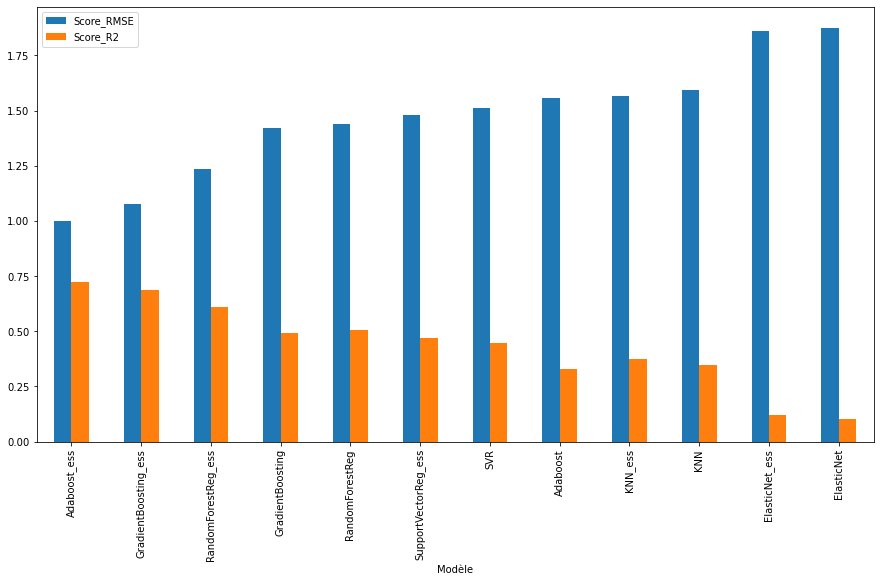

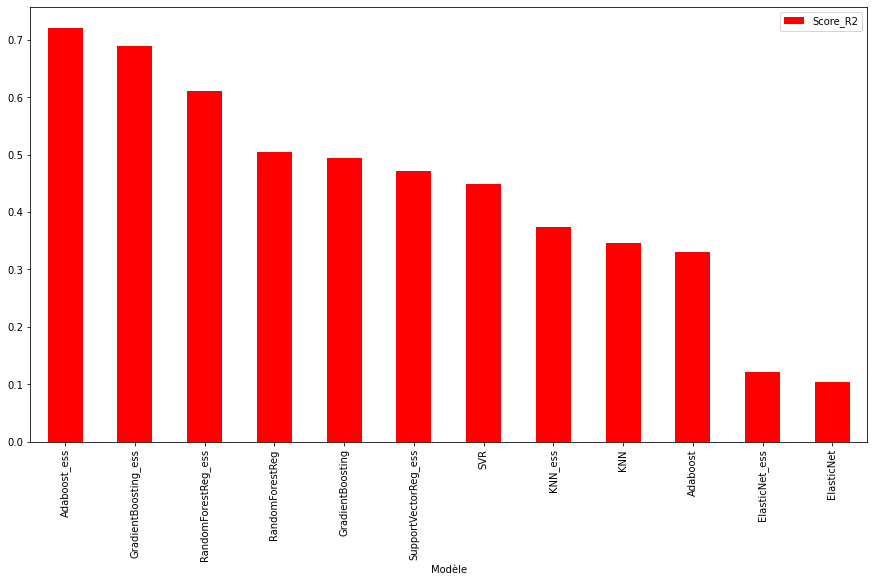

In [149]:
resultats_2_RMSE_tri = resultats_2.sort_values(by ='Score_RMSE', ascending = True)
resultats_2_RMSE_tri.plot(x = 'Modèle', y= ['Score_RMSE', 'Score_R2'], kind = 'bar', figsize =(15,8))
resultats_2_R2_tri = resultats_2.sort_values(by ='Score_R2', ascending = False)
resultats_2_R2_tri.plot(x = 'Modèle', y= ['Score_R2'], kind = 'bar', color ='red', figsize =(15,8))

Elapsed time to compute the importances: 5.685 seconds


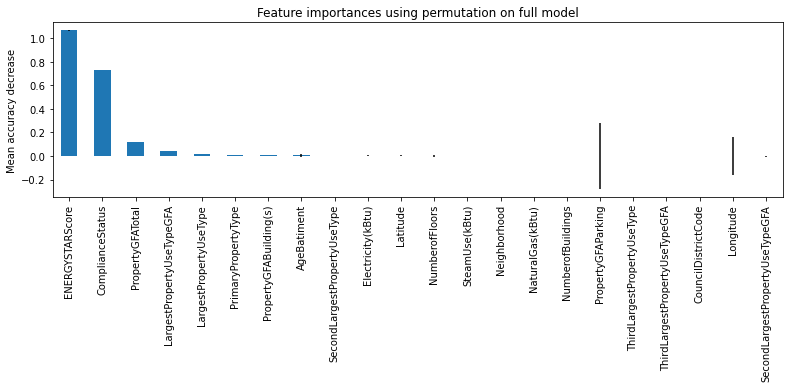

In [150]:
import time
start_time = time.time()

result = permutation_importance(
    pic_ada_ess_search2, X_ess_test, y_ess_test, n_repeats=30, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances2 = pd.Series(result.importances_mean, index=X_ess_train.columns)
forest_importances2 = forest_importances2.sort_values(ascending= False)
fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.set_size_inches(12
                    , 10.5)
plt.show()

##### On remarque que l'importance de l'ENERGYSTARScore est énorme dans la modélisation par Adaboost ( ce dernier permet d'augmenter considérablement les performances de chacun des modèles)

## Entraînement du modèle optimal puis comparaison des prédictions et des valeurs réelles

In [151]:
y_predicted = pic_ada_ess_search2.predict(X_ess_test)

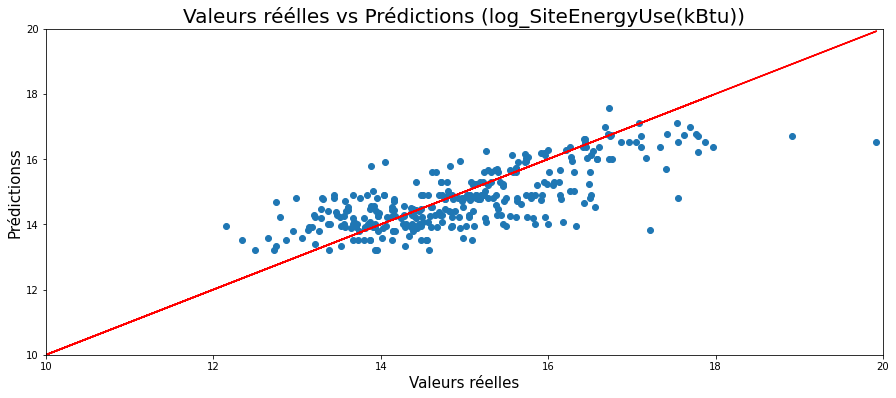

In [152]:
fig = plt.figure(figsize=(15, 6))
plt.title('Valeurs réélles vs Prédictions ({})'.format('log_SiteEnergyUse(kBtu)'), fontsize=20)
plt.xlabel('Valeurs réelles', fontsize=15)
plt.ylabel('Prédictionss', fontsize=15)
plt.xlim([10, 20])
plt.ylim([10, 20])

# Plotting the scatter plot
plt.scatter(y_ess_test, y_predicted)

# Plotting the x=y line
plot = plt.plot(y_ess_test, y_ess_test, color='red')